In [25]:
%matplotlib inline

import numpy as np
from lifelines import KaplanMeierFitter
from matplotlib import pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

plt.style.use('ggplot')

def run_survival(data, group_by=None, groups=[]):
    time_column = 'time'
    observation_column = 'death'

    ax = plt.subplot(111)
    kmf = KaplanMeierFitter()
    
    if group_by is None:
        kmf.fit(data[time_column], data[observation_column])

        print(kmf.survival_function_.head())
        print('Median')
        print(kmf.median_)

        kmf.plot(ax=ax)
    else:
        kmf.fit(data[time_column], data[observation_column], label='baseline')

        print(kmf.survival_function_.head())
        print('Median')
        print(kmf.median_)

        kmf.plot(ax=ax)

        grouped_data = data.groupby([group_by])
        plt.title(group_by)

        if len(groups) == 0:
            groups = np.sort(data[group_by].unique())

        for group in groups:
            d = grouped_data.get_group(group)
            print(group, len(d))
            kmf.fit(d[time_column], d[observation_column], label=group)

            print(kmf.survival_function_.head())
            print('Median')
            print(kmf.median_)

            kmf.plot(ax=ax)

    return ax

In [20]:
from lifelines.datasets import load_larynx

df = load_larynx()
df['Stage'] = 'Stage I'
df.ix[df['Stage II']==1, 'Stage'] = 'Stage II'
df.ix[df['Stage III']==1, 'Stage'] = 'Stage III'
df.ix[df['Stage IV']==1, 'Stage'] = 'Stage IV'
df.head()

,time,age,death,Stage II,Stage III,Stage IV,Stage
0,0.6,77,1,0,0,0,Stage I
1,1.3,53,1,0,0,0,Stage I
2,2.4,45,1,0,0,0,Stage I
3,2.5,57,0,0,0,0,Stage I
4,3.2,58,1,0,0,0,Stage I


          KM_estimate
timeline             
0.0          1.000000
0.1          0.988889
0.2          0.977778
0.3          0.944444
0.4          0.933333
Median
6.0


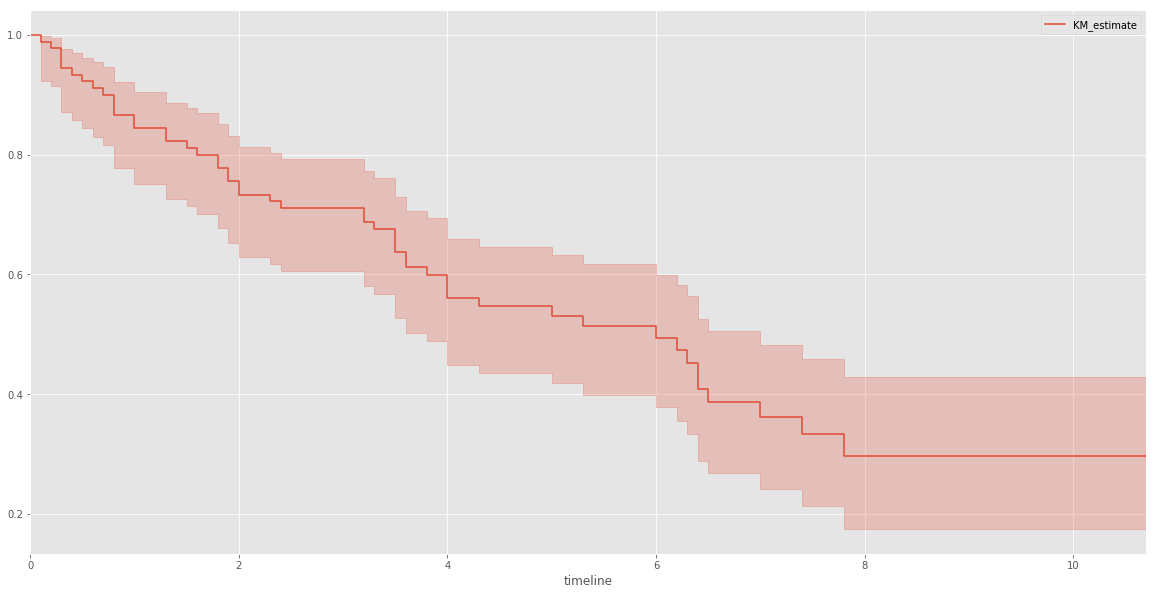

In [26]:
run_survival(df)

          baseline
timeline          
0.0       1.000000
0.1       0.988889
0.2       0.977778
0.3       0.944444
0.4       0.933333
Median
6.0
Stage I 33
           Stage I
timeline          
0.0       1.000000
0.6       0.969697
1.3       0.939394
2.4       0.909091
2.5       0.909091
Median
6.5
Stage II 17
          Stage II
timeline          
0.0       1.000000
0.2       0.941176
1.8       0.882353
2.0       0.823529
2.2       0.823529
Median
7.0
Stage III 27
          Stage III
timeline           
0.0        1.000000
0.3        0.925926
0.5        0.888889
0.7        0.851852
0.8        0.814815
Median
5.0
Stage IV 13
          Stage IV
timeline          
0.0       1.000000
0.1       0.923077
0.3       0.846154
0.4       0.769231
0.8       0.615385
Median
1.5


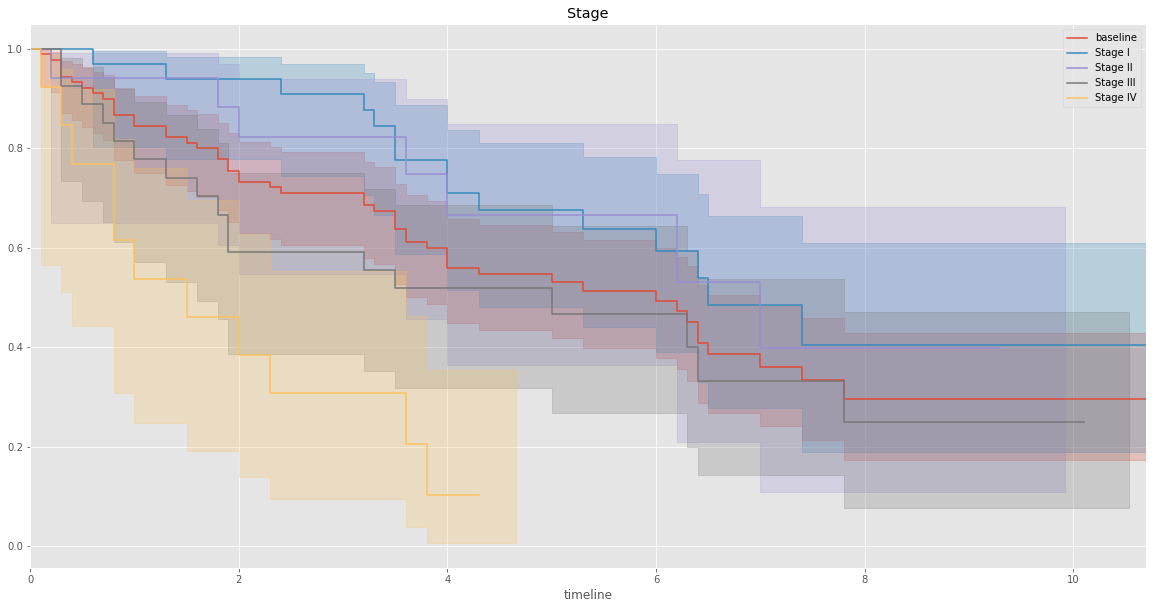

In [27]:
run_survival(df, 'Stage')

          baseline
timeline          
0.0       1.000000
0.1       0.988889
0.2       0.977778
0.3       0.944444
0.4       0.933333
Median
6.0
Stage I 33
           Stage I
timeline          
0.0       1.000000
0.6       0.969697
1.3       0.939394
2.4       0.909091
2.5       0.909091
Median
6.5


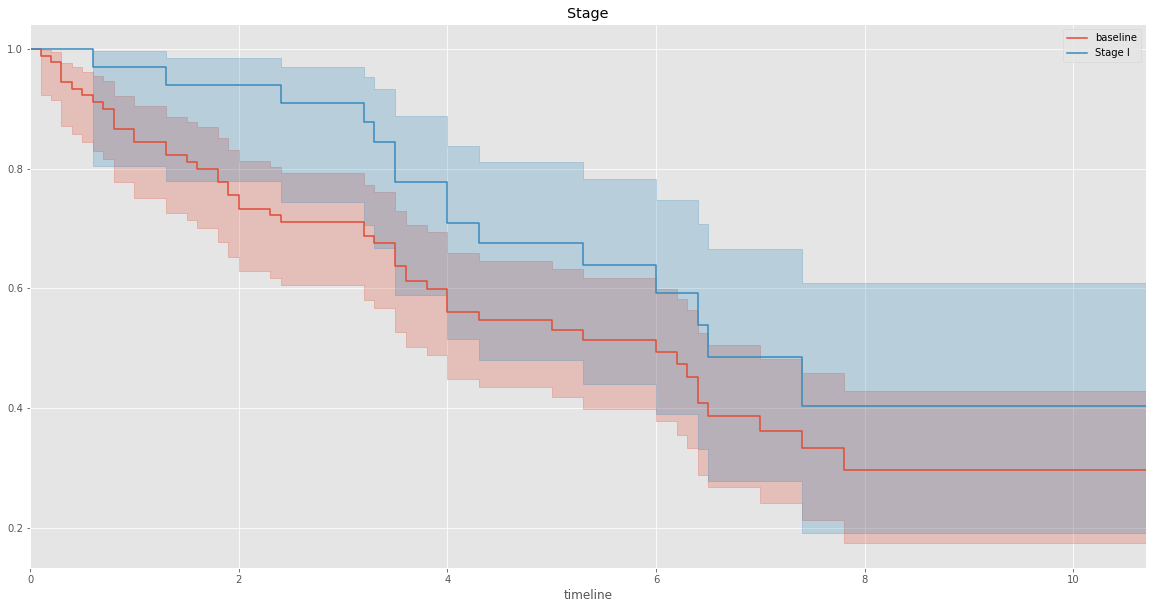

In [30]:
run_survival(df, 'Stage', ['Stage I'])

          baseline
timeline          
0.0       1.000000
0.1       0.988889
0.2       0.977778
0.3       0.944444
0.4       0.933333
Median
6.0
Stage II 17
          Stage II
timeline          
0.0       1.000000
0.2       0.941176
1.8       0.882353
2.0       0.823529
2.2       0.823529
Median
7.0


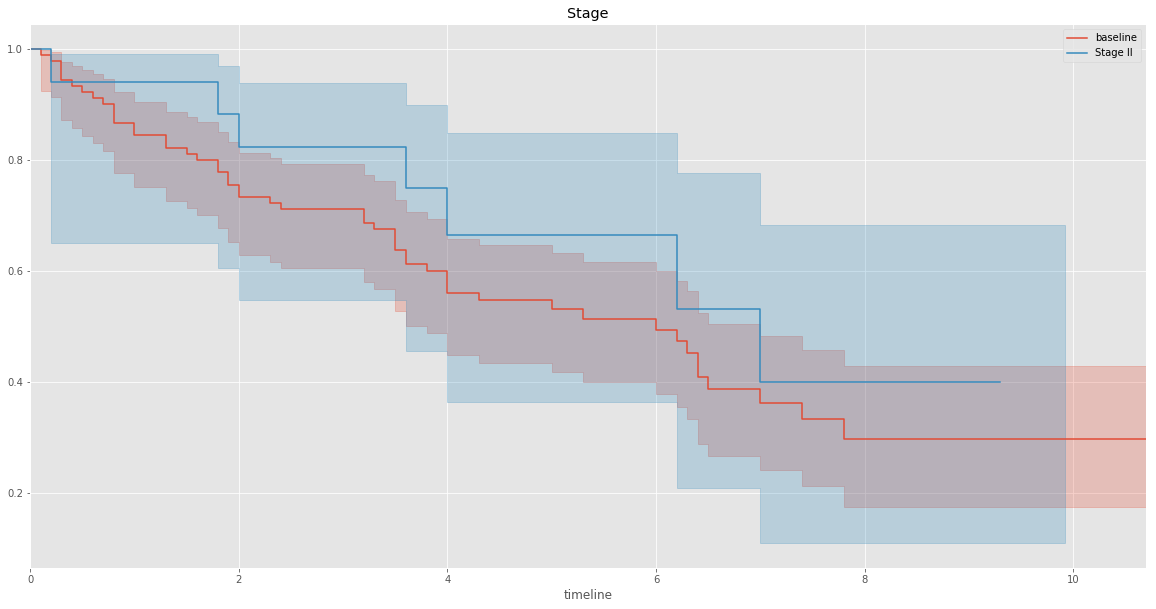

In [31]:
run_survival(df, 'Stage', ['Stage II'])

          baseline
timeline          
0.0       1.000000
0.1       0.988889
0.2       0.977778
0.3       0.944444
0.4       0.933333
Median
6.0
Stage III 27
          Stage III
timeline           
0.0        1.000000
0.3        0.925926
0.5        0.888889
0.7        0.851852
0.8        0.814815
Median
5.0


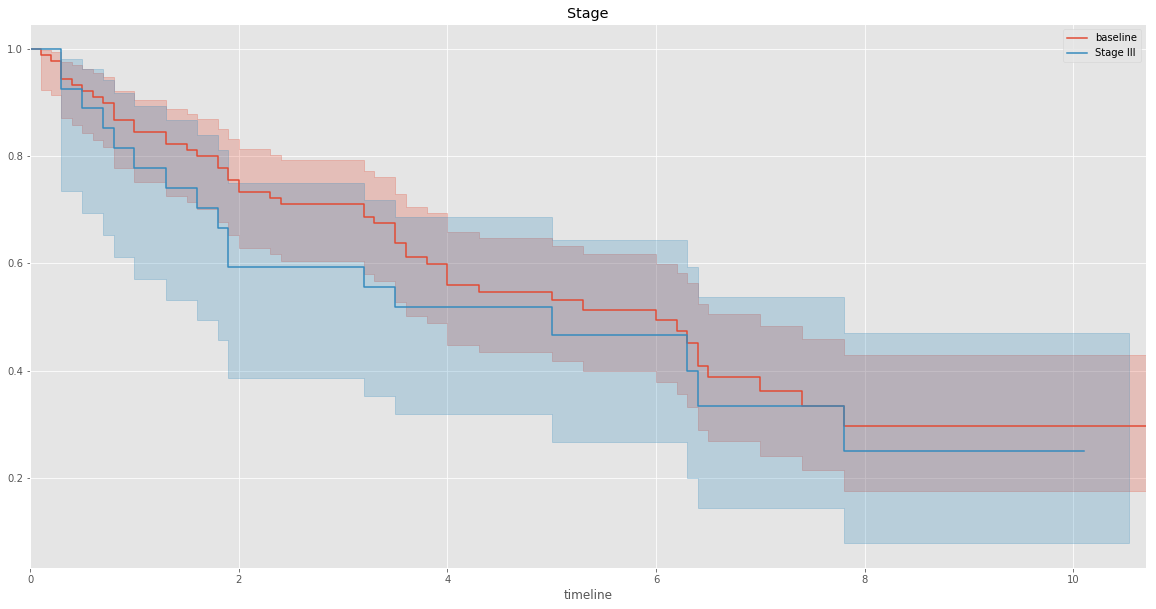

In [32]:
run_survival(df, 'Stage', ['Stage III'])

          baseline
timeline          
0.0       1.000000
0.1       0.988889
0.2       0.977778
0.3       0.944444
0.4       0.933333
Median
6.0
Stage IV 13
          Stage IV
timeline          
0.0       1.000000
0.1       0.923077
0.3       0.846154
0.4       0.769231
0.8       0.615385
Median
1.5


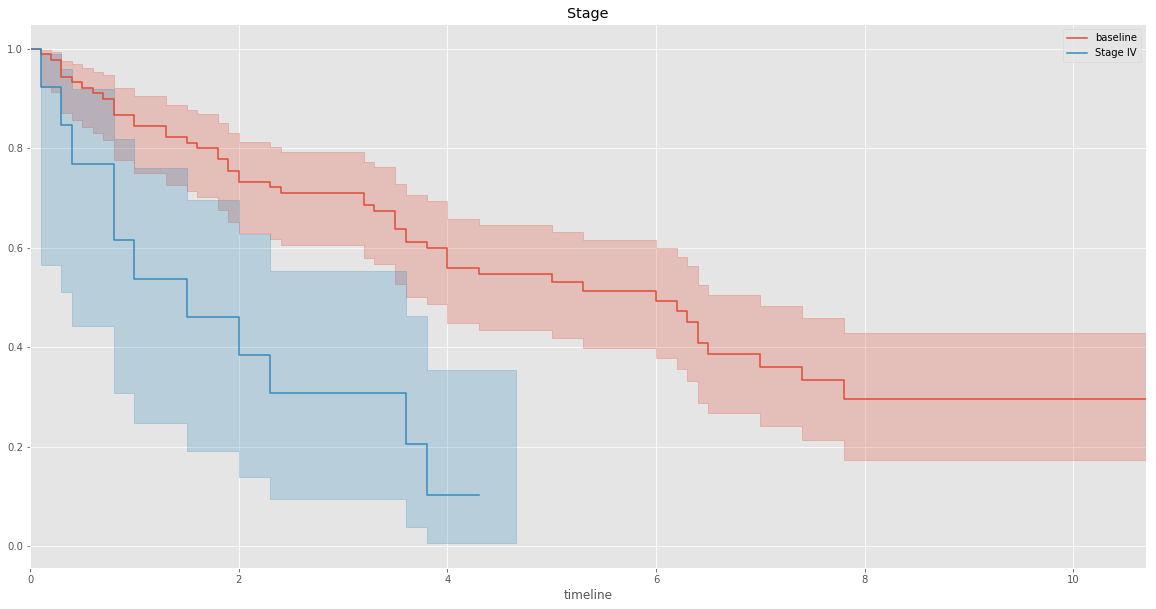

In [33]:
run_survival(df, 'Stage', ['Stage IV'])